In [1]:
# Setup
import sys
import os
import higlass as hg

hg.__version__

'1.0.0'

In [ ]:
## remote data
tileset1 = hg.remote(
    uid="CQMd6V_cRw6iCI_-Unl3PQ",
    server="https://higlass.io/api/v1/",
    name="Rao et al. (2014) GM12878 MboI (allreps) 1kb",
)

## local data
tileset2 = hg.cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool",
                     uid="RCMC") #::/resolutions/1000


In [ ]:
t = tileset2.track('heatmap',server_port = 37514,height = 300)

hg.view(t)

In [8]:
import sys
import os
import cooler
import cooltools
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
cooler.fileops.list_coolers('/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool')

['/resolutions/50',
 '/resolutions/100',
 '/resolutions/200',
 '/resolutions/250',
 '/resolutions/400',
 '/resolutions/500',
 '/resolutions/800',
 '/resolutions/1000',
 '/resolutions/1600',
 '/resolutions/2000',
 '/resolutions/3200',
 '/resolutions/5000',
 '/resolutions/6400',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000',
 '/resolutions/10000000']

In [6]:
c1 = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/100")

In [7]:
Ppm1g_gene = c1.bins().fetch("chr5:31394565-31412789")

In [8]:
Ppm1g_gene_mat = c1.matrix(sparse=True).fetch("chr5:31394565-31412789")
Ppm1g_gene_mat.shape

(183, 183)

In [9]:
arr2 = Ppm1g_gene_mat.toarray()

In [ ]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111)
# im = ax.matshow(np.log10(arr2), cmap='YlOrRd')
# fig.colorbar(im)

In [10]:
Ppm1g_locus_mat = c1.matrix(sparse=True).fetch("chr5:31263455-31457721")

In [10]:
clr = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/1000")
clr100 = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/100")
clr50 = cooler.Cooler("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool::/resolutions/50")

In [11]:
chromstarts = []
for i in clr.chromnames:
    #print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])

In [ ]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow((clr.matrix(balance=False)[:]),vmax=500);
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.set(xticks=chromstarts, xticklabels=clr.chromnames,
       xlabel='position, chrom#', ylabel='position, bin#')
ax.xaxis.set_label_position('top')

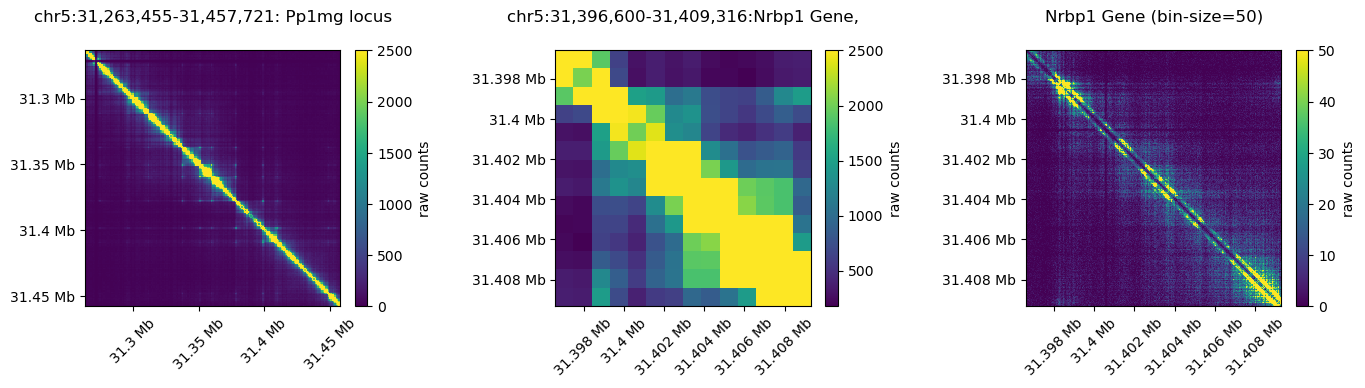

In [16]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)

# ax = axs[0]
# im = ax.matshow(
#     clr.matrix(balance=False).fetch('chr5'),
#     vmax=2500,
#     extent=(0,clr.chromsizes['chr5'], clr.chromsizes['chr5'], 0)
# );
# plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
# ax.set_title('chr5', y=1.08)
# ax.set_ylabel('position, Mb')
# format_ticks(ax)

ax = axs[0]
start, end = 31_263_455, 31_457_721
region1 = ('chr5', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region1),
    vmax=2500,
    extent=(start, end, end, start)
);
ax.set_title(f'chr5:{start:,}-{end:,}: Pp1mg locus', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()

ax = axs[1]
start, end = 31_396_600, 31_409_316
region2 = ('chr5', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region2),
    vmax=2500,
    extent=(start, end, end, start)
);
ax.set_title(f'chr5:{start:,}-{end:,}:Nrbp1 Gene,', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)

ax = axs[2]
start, end = 31_396_600, 31_409_316
region2 = ('chr5', start, end)
im = ax.matshow(
    clr50.matrix(balance=False).fetch(region2),
    vmax=50,
    extent=(start, end, end, start)
);
ax.set_title(f'Nrbp1 Gene (bin-size=50)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()

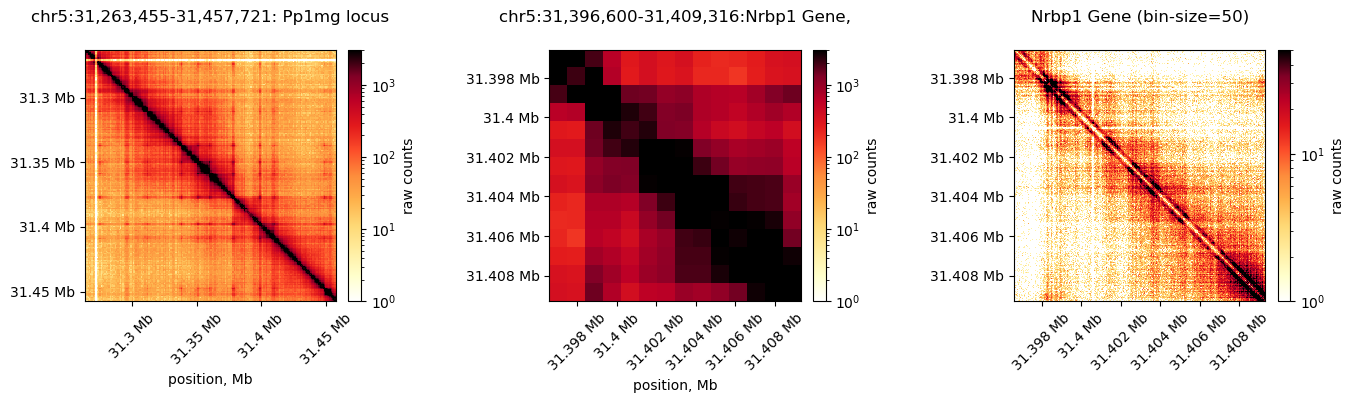

In [18]:
from matplotlib.colors import LogNorm
import cooltools.lib.plotting

f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmin=1,vmax=3_000)

ax = axs[0]
start, end = 31_263_455, 31_457_721
region1 = ('chr5', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region1),
    cmap='fall',
    #vmax=2500,
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr5:{start:,}-{end:,}: Pp1mg locus', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set(xlabel='position, Mb')
format_ticks(ax)

ax = axs[1]
start, end = 31_396_600, 31_409_316
region2 = ('chr5', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region2),
    cmap='fall',
    #vmax=2500,
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr5:{start:,}-{end:,}:Nrbp1 Gene,', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set(xlabel='position, Mb')
format_ticks(ax)

ax = axs[2]
start, end = 31_396_600, 31_409_316
region2 = ('chr5', start, end)
im = ax.matshow(
    clr50.matrix(balance=False).fetch(region2),
    cmap='fall',
    norm = LogNorm(vmin=1,vmax=50),
    extent=(start, end, end, start)
);
ax.set_title(f'Nrbp1 Gene (bin-size=50)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()


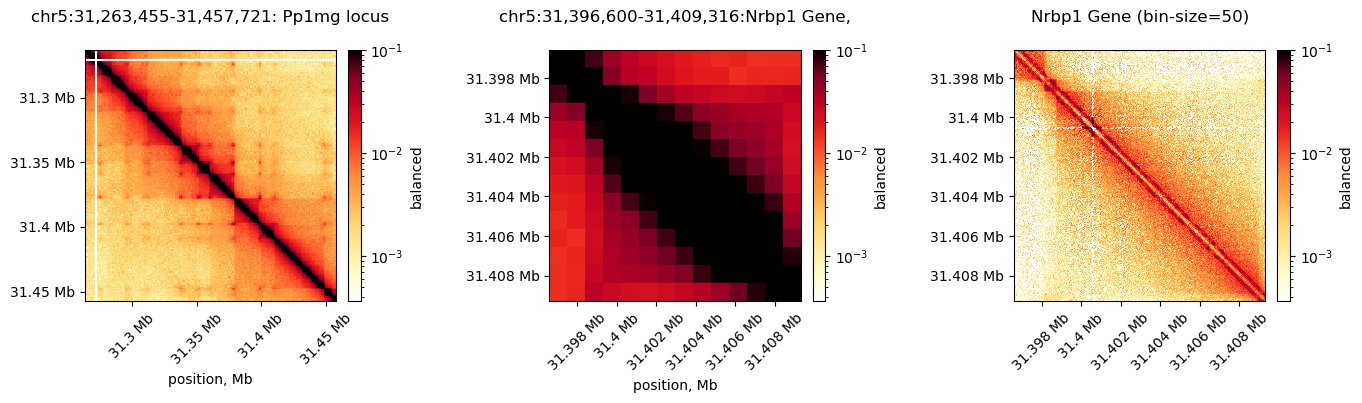

In [23]:
from matplotlib.colors import LogNorm
import cooltools.lib.plotting

f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)
bp_formatter = EngFormatter('b')
norm = LogNorm(vmax=0.1)

ax = axs[0]
start, end = 31_263_455, 31_457_721
region1 = ('chr5', start, end)
im = ax.matshow(
    clr.matrix().fetch(region1),
    cmap='fall',
    #vmax=2500,
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr5:{start:,}-{end:,}: Pp1mg locus', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
ax.set(xlabel='position, Mb')
format_ticks(ax)

ax = axs[1]
start, end = 31_396_600, 31_409_316
region2 = ('chr5', start, end)
im = ax.matshow(
    clr.matrix().fetch(region2),
    cmap='fall',
    #vmax=2500,
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'chr5:{start:,}-{end:,}:Nrbp1 Gene,', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
ax.set(xlabel='position, Mb')
format_ticks(ax)

ax = axs[2]
start, end = 31_396_600, 31_409_316
region2 = ('chr5', start, end)
im = ax.matshow(
    clr50.matrix().fetch(region2),
    cmap='fall',
    norm = norm,
    extent=(start, end, end, start)
);
ax.set_title(f'Nrbp1 Gene (bin-size=50)', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='balanced');
format_ticks(ax)
plt.tight_layout()


In [29]:
# from cooltools.lib.numutils import adaptive_coarsegrain, interp_nan


# start, end = 31_396_600, 31_409_316
# region2 = ('chr5', start, end)
# extents = (start, end, end, start)

# cg = adaptive_coarsegrain(clr50.matrix(balance=True).fetch(region2),
#                               clr50.matrix(balance=False).fetch(region2)
#                                 ,cutoff=3, max_levels=8)

# cgi = interp_nan(cg)

# f, axs = plt.subplots(
#     figsize=(18,5),
#     nrows=1,
#     ncols=3,
#     sharex=True, sharey=True)

# ax = axs[0]
# im = ax.matshow(clr50.matrix(balance=True).fetch(region2), cmap='fall', norm=norm, extent=extents)
# ax.set_title('corrected')

# ax = axs[1]
# im2 = ax.matshow(cg, cmap='fall', norm=norm, extent=extents)
# ax.set_title(f'adaptively coarsegrained')

# ax = axs[2]
# im3 = ax.matshow(cgi, cmap='fall', norm=norm, extent=extents)
# ax.set_title(f'interpolated')

# for ax in axs:
#     format_ticks(ax, rotate=False)

# plt.colorbar(im3, ax=axs, fraction=0.046, label='corrected frequencies')

In [18]:
import coolbox
from coolbox.api import *
from coolbox.core.track.hicmat import Cool
coolbox.__version__

'0.3.8'

In [3]:
# Here, we define const values for reference files easily later
DATA_DIR = "/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/"
ANNOT_DIR = "/gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39/"
TEST_RANGE = "chr5_31263455_31457721"
RANGE_MARK = "chr5_31263455_31457721"

[W::hts_idx_load3] The index file is older than the data file: /gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39//GRCm39_GENCODE_VM27.bed.bgz.tbi


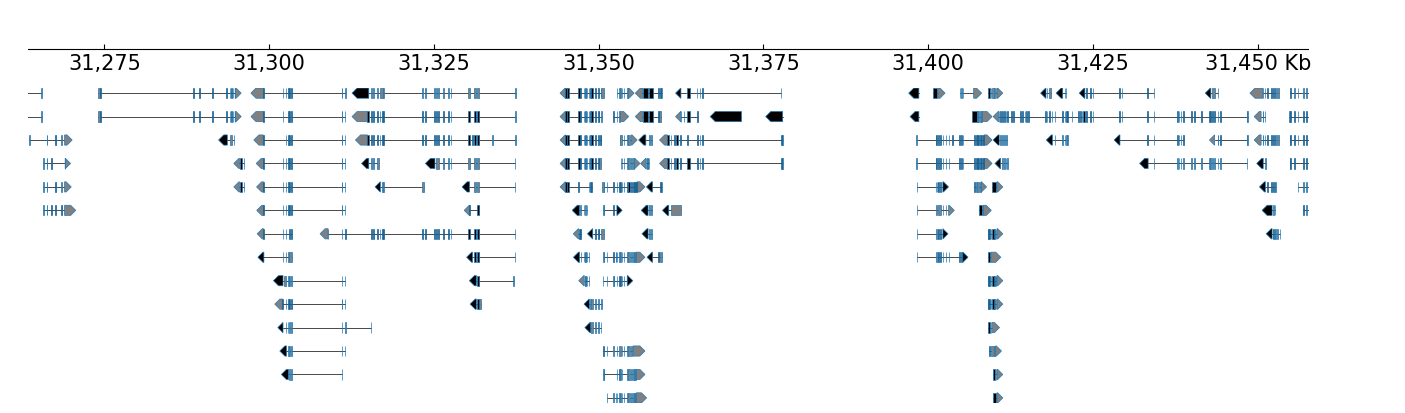

In [5]:
frame = XAxis() + BED(f"{ANNOT_DIR}/GRCm39_GENCODE_VM27.bed") + TrackHeight(8)

frame.plot("chr5:31263455-31457721")

[W::hts_idx_load3] The index file is older than the data file: /gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39//GRCm39_GENCODE_VM27.bed.bgz.tbi


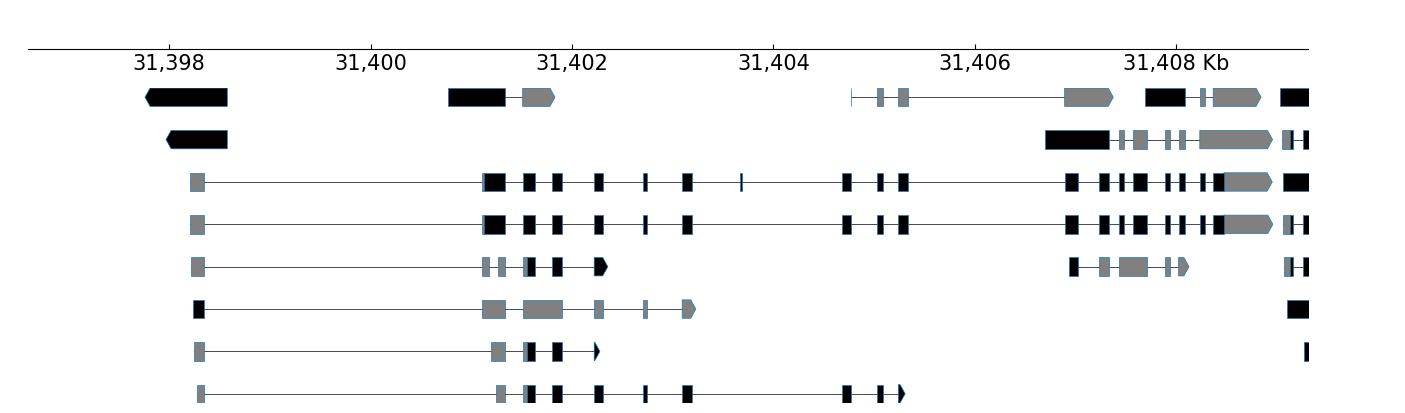

In [6]:
frame.plot("chr5:31396600-31409316")

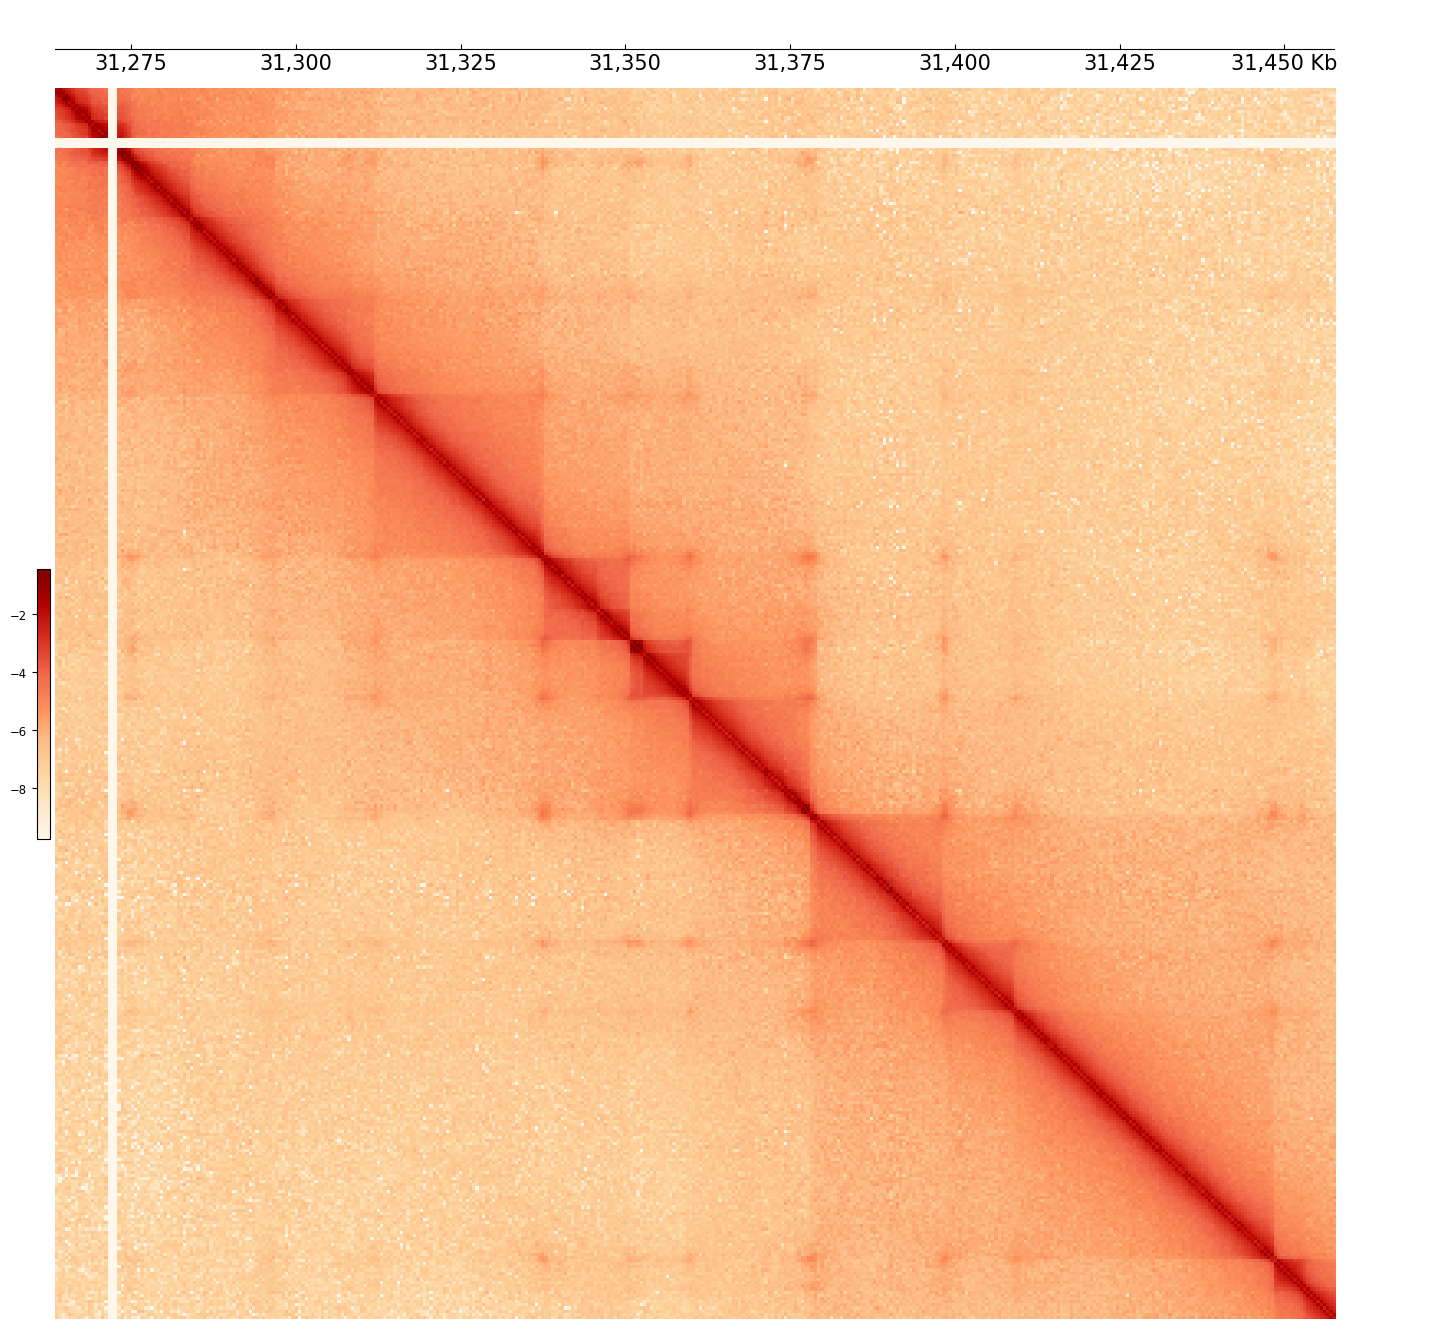

In [23]:
frame = XAxis() + HiCMat("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool",
                         resolution=500, style="matrix", depth_ratio=0.85, balance=True, cmap="OrRd")
frame.plot("chr5:31263455-31457721")

In [34]:
frame = XAxis() + HiCMat("/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool",
                         resolution=500, style="matrix", depth_ratio=0.85, balance=True, cmap="YlOrRd") + Title("Locus") + \
    Spacer(0.5) + \
    BED(f"{ANNOT_DIR}/GRCm39_GENCODE_VM27.bed") + Title("BED Track") + TrackHeight(8) 

[W::hts_idx_load3] The index file is older than the data file: /gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39//GRCm39_GENCODE_VM27.bed.bgz.tbi


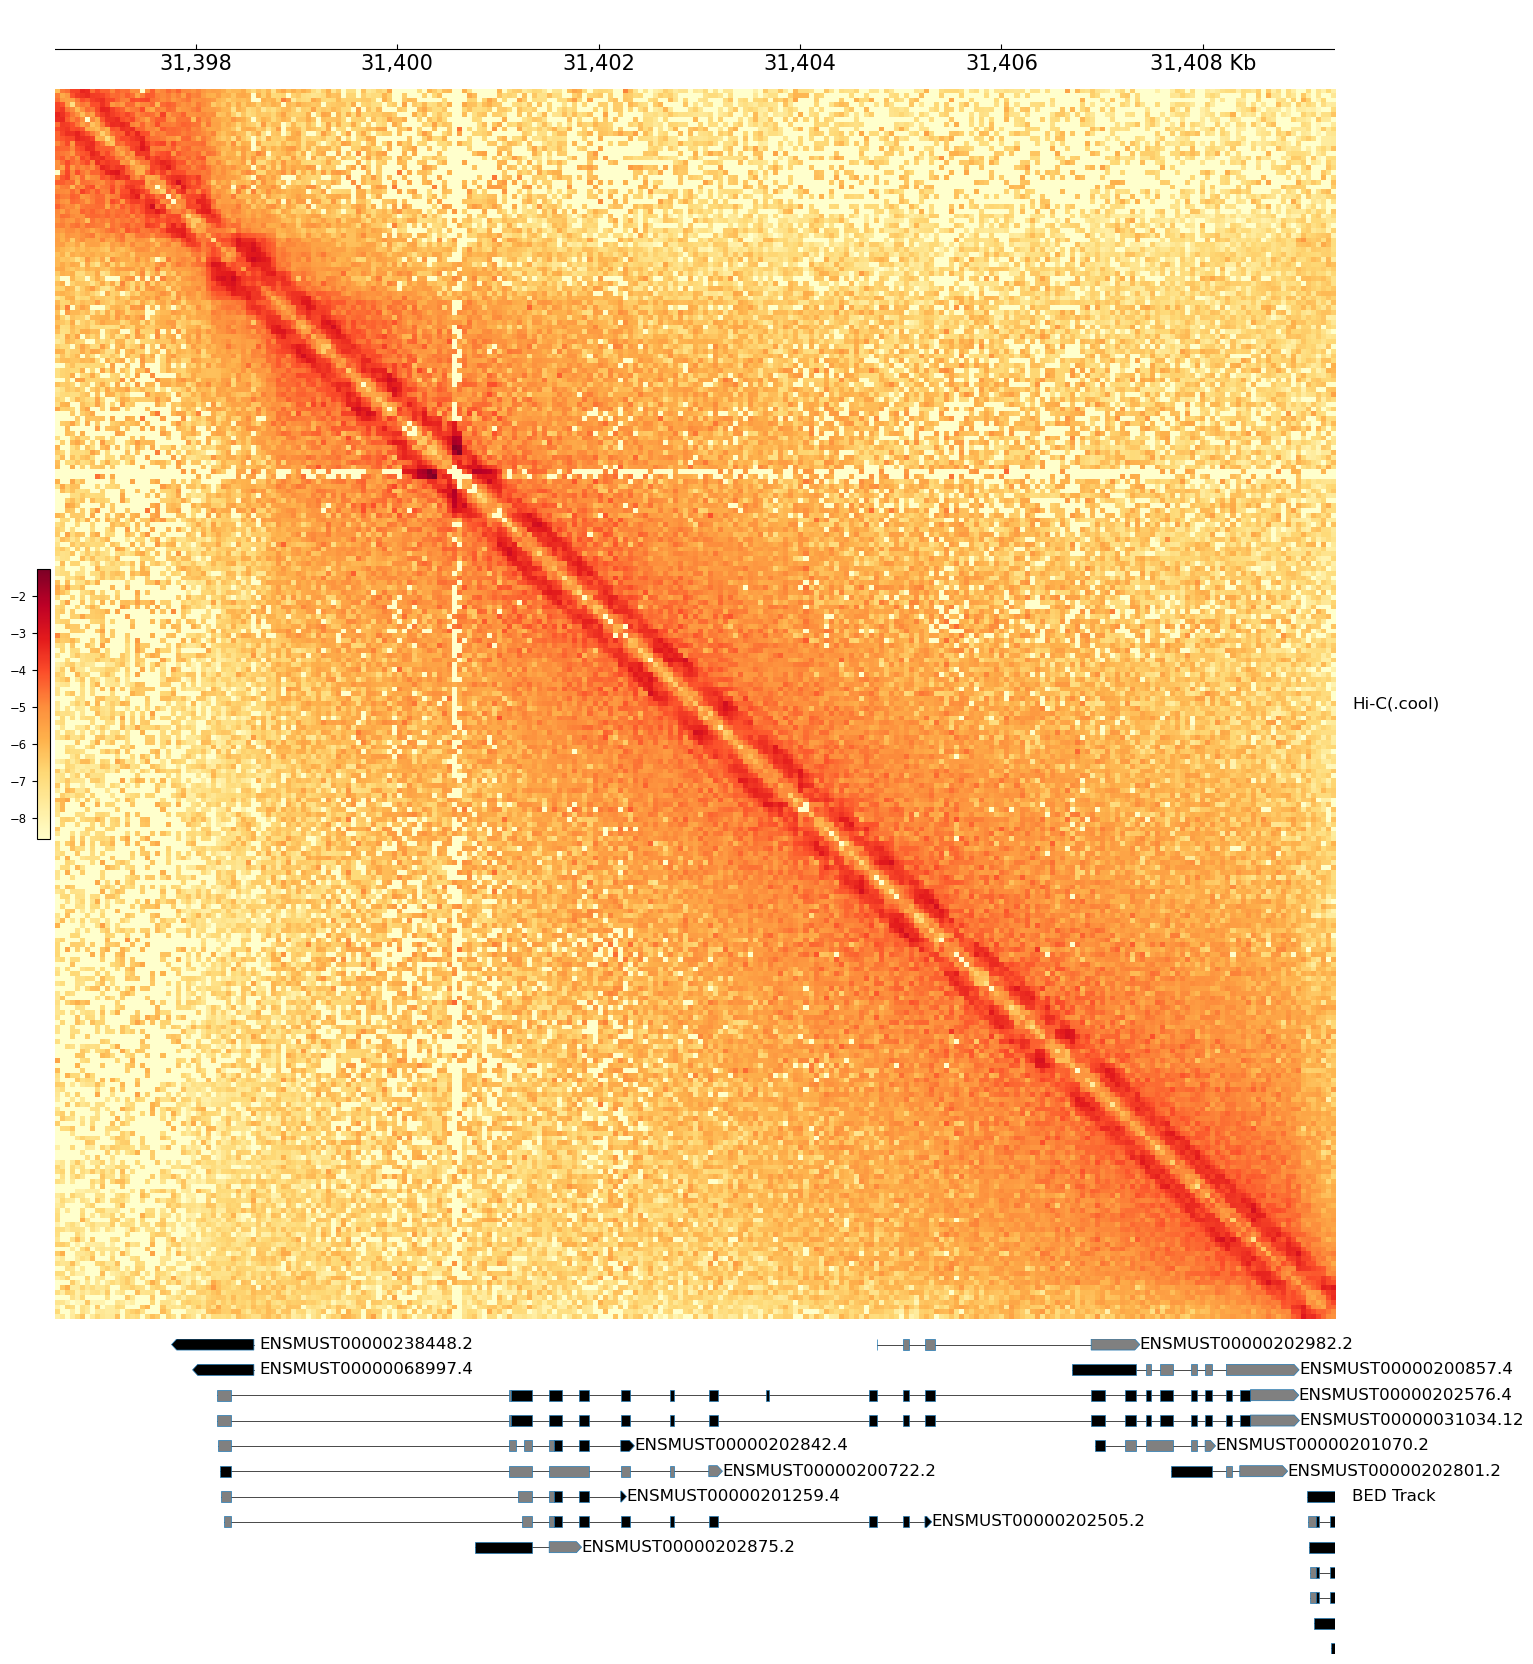

In [29]:
frame.plot("chr5:31396600-31409316")

[W::hts_idx_load3] The index file is older than the data file: /gpfs/commons/groups/gursoy_lab/ajoglekar/Support/References/Mouse/mm39//GRCm39_GENCODE_VM27.bed.bgz.tbi


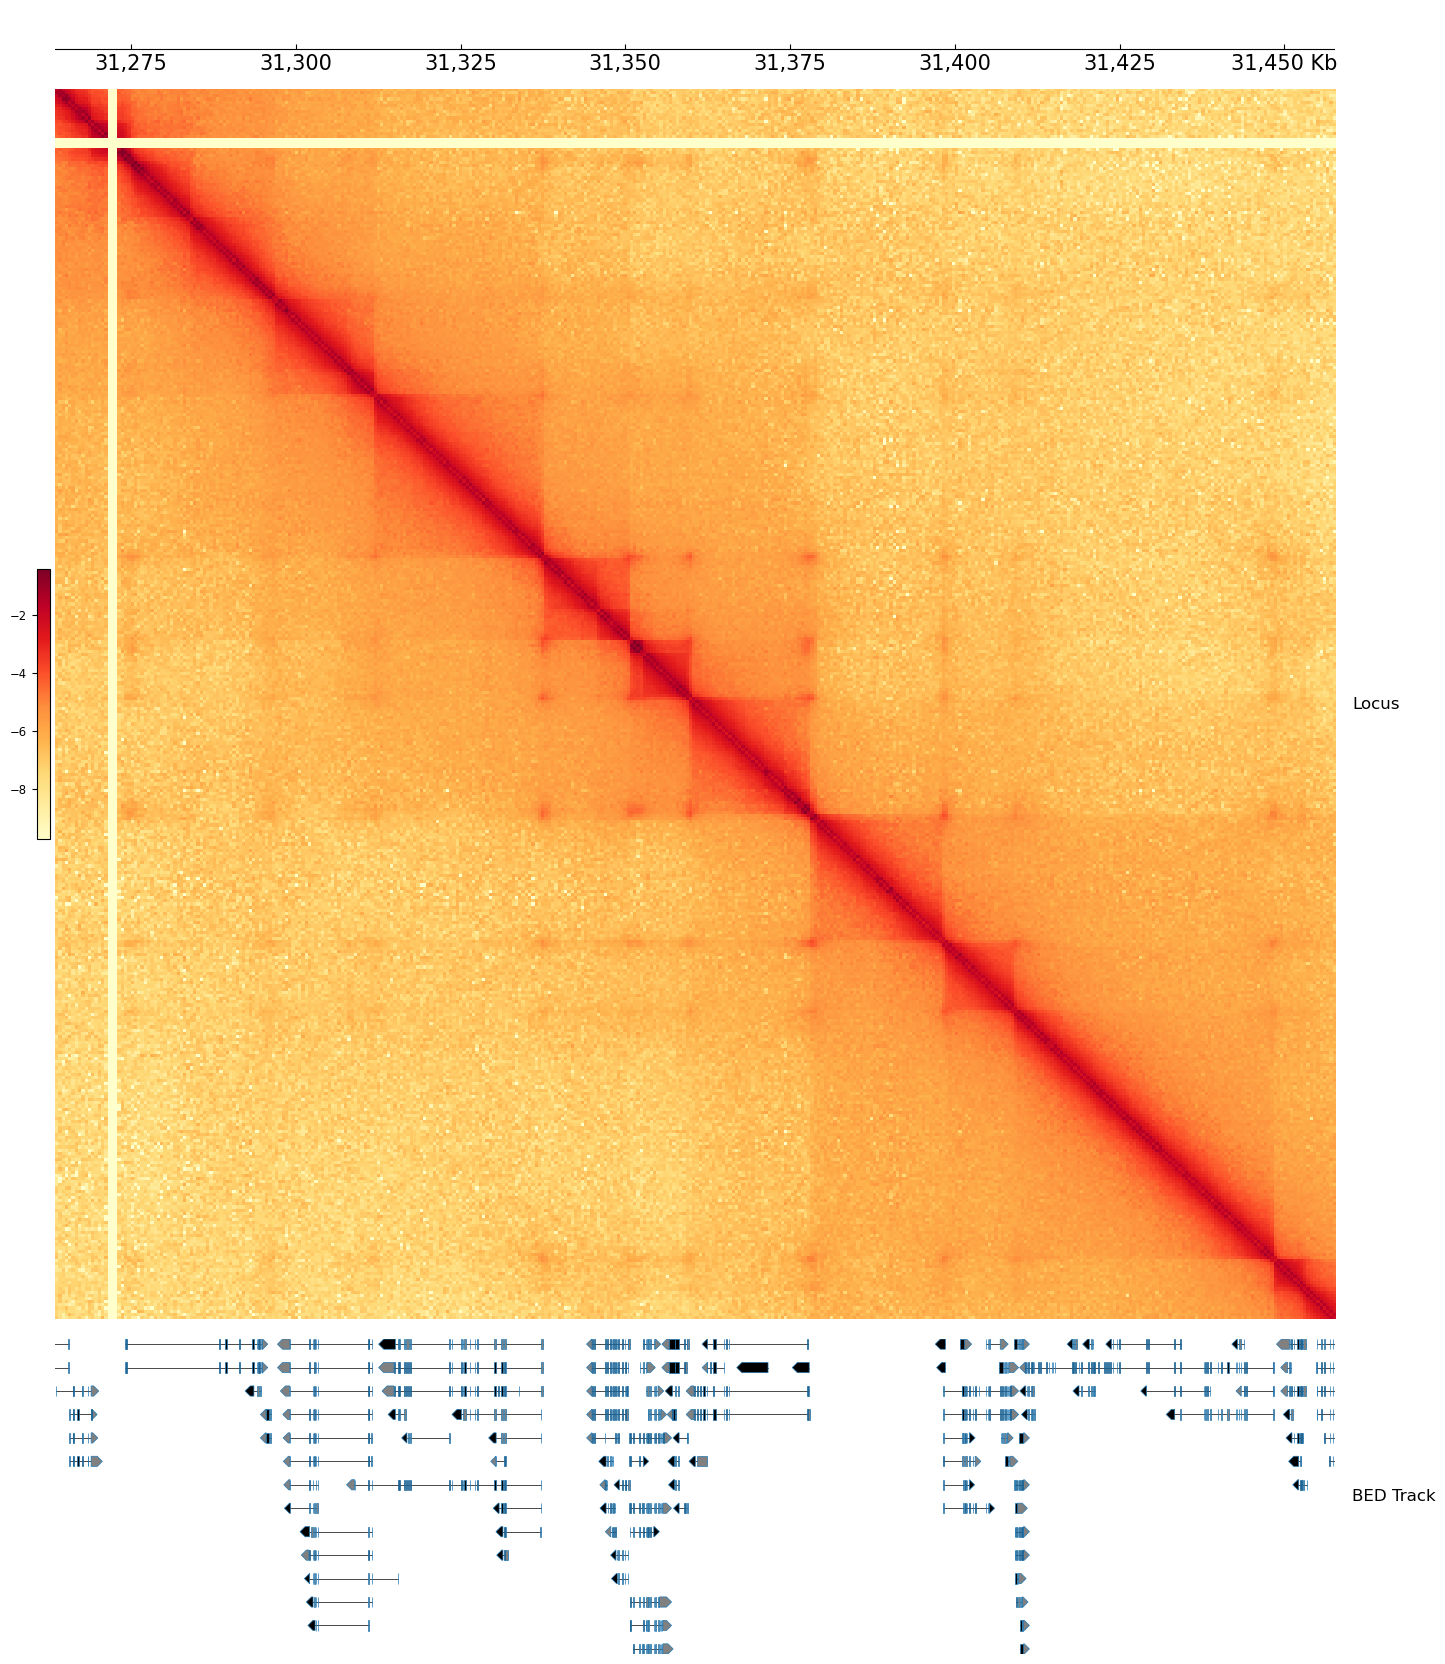

In [35]:
frame.plot('chr5:31263455-31457721')